In [1]:
# Sinan Yumurtaci
# Psychology Research with Professor Derek Huffman

# PythonLogProcessing.ipynb
# processes a log file into a format more suitable for further analysis
# demonstrates some simple plots of that data.

In [2]:
# imports

import csv
import numpy as np 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [3]:
# constants

LOGFILE_NAME = "default_default_pto1_default.log"

In [4]:
timestamps = np.empty((0,1))
positions = np.empty((0,3))
rotations = np.empty((0,3))
tasks = np.empty((0,1))
task_ids = np.empty((0,1))

In [5]:
# read through the file and populate the relevant arrays

with open(LOGFILE_NAME) as logfile:
    logreader = csv.reader(logfile, delimiter='\t')
    current_task = "UNDEFINED TASK"
    current_task_id = 0
    for row in logreader:
        if len(row) > 2:
            if row[1] == "Avatar: ": # tracking position, rotation

                # KNOWN BUG: if the log-file is cut in the middle of a row, this section might error out
                time = int(row[0])
                pos = [float(x) for x in row[4:7]]
                rot = [float(x) for x in row[12:15]]

                timestamps = np.append(timestamps,  np.array(time))
                positions = np.append(positions, np.array([pos]), axis = 0)
                rotations = np.append(rotations, np.array([rot]), axis = 0)
                tasks = np.append(tasks, np.array([current_task]))
                task_ids = np.append(task_ids, np.array([current_task_id]))

            if row[1] == "TASK_START":
                current_task = row[2]
                current_task_id += 1

<IPython.core.display.Javascript object>


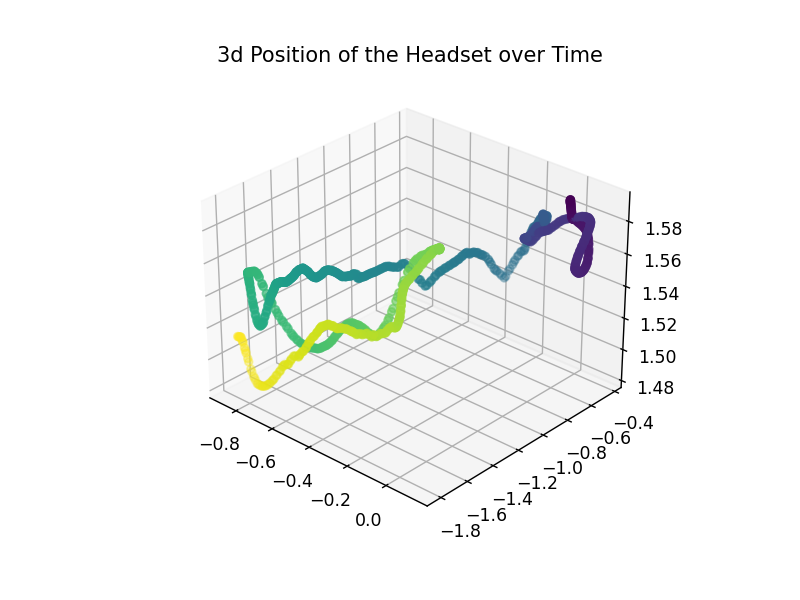

In [6]:
# simple plot of position over time.
# color gradient describes movement over time

# syntax for 3-D projection 
fig = plt.figure() 
ax = plt.axes(projection ='3d') 

# defining axes
x = positions[:,0]
y = positions[:,2]
z = positions[:,1]

c = timestamps

ax.scatter(x, y, z, c = c)
ax.set_title('3d Position of the Headset over Time')

plt.show() 

<IPython.core.display.Javascript object>


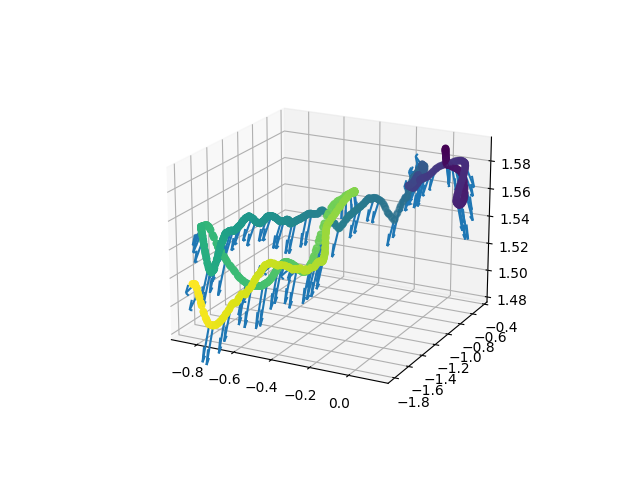

In [55]:
# quiver plot showing position & rotation over time
# there is no coloring available with this plot



# syntax for 3-D projection
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
u = rotations[:,0]
v = rotations[:,2]
w = rotations[:,1]
ax.scatter(x, y, z, c = c)
ax.quiver(x[::15], y[::15], z[::15],
          u[::15], v[::15], w[::15], normalize = True, length = 0.05)
plt.show()
